# CENSUS DATA FROM WASHINGTON DC

## Import libraries

In [33]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import ipyleaflet

In [2]:
%config InlineBackend.figure_format = 'retina'

## Import data

In [4]:
# Import the `WashingtonDCCensus.geojson` data file and assign it to a variable named `gdf`.
gdf = gpd.read_file("/Users/jayklopper/Documents/GeoDataScience/Notebooks/WashingtonDCCensusData.geojson")

In [5]:
# Display information about the GeoDataFrame
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             207 non-null    object  
 1   name              207 non-null    object  
 2   B02001001         207 non-null    float64 
 3   B02001001, Error  206 non-null    float64 
 4   B02001002         207 non-null    float64 
 5   B02001002, Error  207 non-null    float64 
 6   B02001003         207 non-null    float64 
 7   B02001003, Error  207 non-null    float64 
 8   B02001004         207 non-null    float64 
 9   B02001004, Error  207 non-null    float64 
 10  B02001005         207 non-null    float64 
 11  B02001005, Error  207 non-null    float64 
 12  B02001006         207 non-null    float64 
 13  B02001006, Error  207 non-null    float64 
 14  B02001007         207 non-null    float64 
 15  B02001007, Error  207 non-null    float64 
 16  B02001008         

In [6]:
# Remove all columns that contain the word "Error" in their name
gdf = gdf[gdf.columns.drop(list(gdf.filter(regex='Error')))]

In [7]:
# Display information about the GeoDataFrame
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   geoid      207 non-null    object  
 1   name       207 non-null    object  
 2   B02001001  207 non-null    float64 
 3   B02001002  207 non-null    float64 
 4   B02001003  207 non-null    float64 
 5   B02001004  207 non-null    float64 
 6   B02001005  207 non-null    float64 
 7   B02001006  207 non-null    float64 
 8   B02001007  207 non-null    float64 
 9   B02001008  207 non-null    float64 
 10  B02001009  207 non-null    float64 
 11  B02001010  207 non-null    float64 
 12  geometry   207 non-null    geometry
dtypes: float64(10), geometry(1), object(2)
memory usage: 21.2+ KB


In [8]:
# Replace the names of the columns as follows:
# - "B02001001" to "Total"
# - "B02001002" to "White alone"
# - "B02001003" to "Black or African American alone"
# - "B02001004" to "American Indian and Alaska Native alone"
# - "B02001005" to "Asian alone"
# - "B02001006" to "Native Hawaiian and Other Pacific Islander alone"
# - "B02001007" to "Some other race alone"
# - "B02001008" to "Two or More Races"
# - "B02001009" to "Two races including Some Other Race"
# - "B02001010" to "Two races excluding Some Other Race, and three or more races"
gdf = gdf.rename(columns={
    "B02001001": "Total",
    "B02001002": "White alone",
    "B02001003": "Black or African American alone",
    "B02001004": "American Indian and Alaska Native alone",
    "B02001005": "Asian alone",
    "B02001006": "Native Hawaiian and Other Pacific Islander alone",
    "B02001007": "Some other race alone",
    "B02001008": "Two or More Races",
    "B02001009": "Two races including Some Other Race",
    "B02001010": "Two races excluding Some Other Race, and three or more races"
})

In [13]:
# Display the index of the row with the highest value in the `Total` column
gdf["Total"].idxmax()

206

In [14]:
# Remove the row with the highest value in the `Total` column
gdf = gdf.drop(gdf["Total"].idxmax())

## EDA

In [15]:
# Calculate summary statistics for the `Total` column
gdf["Total"].describe()

count     206.000000
mean     3262.519417
std      1094.046687
min        17.000000
25%      2504.250000
50%      3212.500000
75%      3962.750000
max      7269.000000
Name: Total, dtype: float64

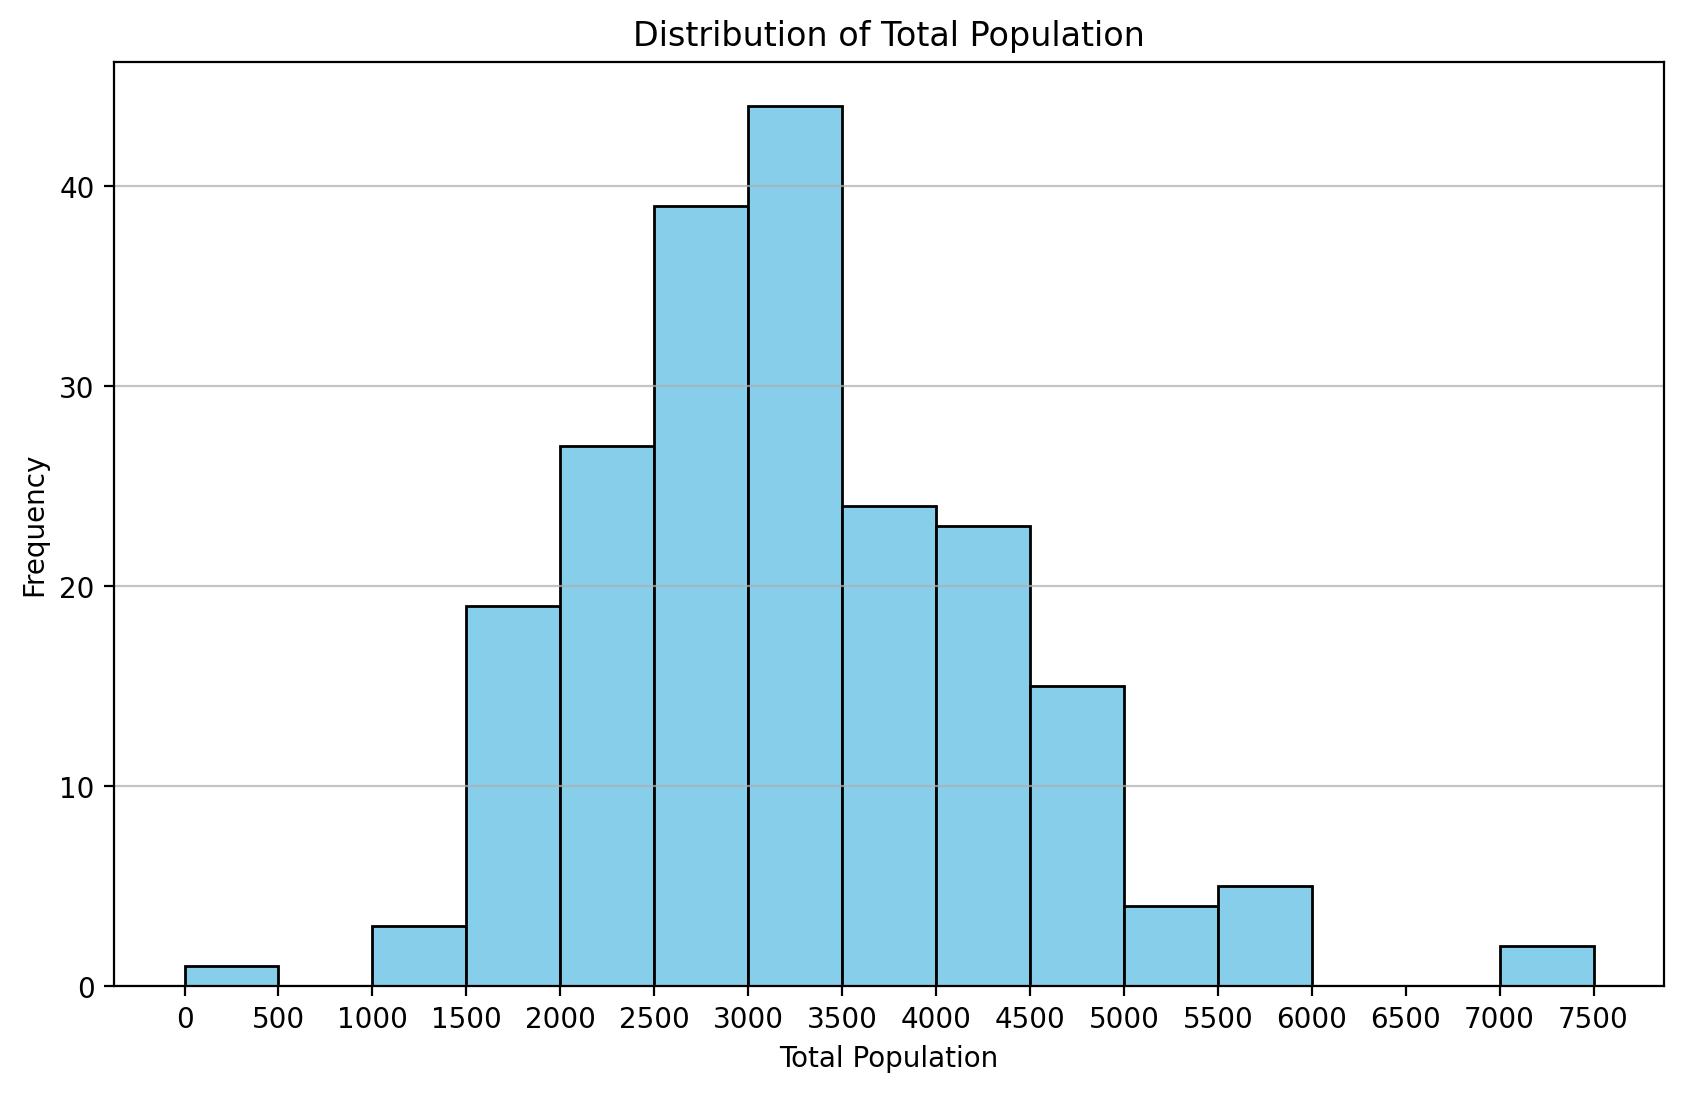

In [17]:
# Create a histogram of the `Total` column
# Start with the bins at 0 and ending at 7500 with a width of 500
# Add the title "Distribution of Total Population"
# Label the x-axis "Total Population"
# Label the y-axis "Frequency"
plt.figure(figsize=(10, 6))
plt.hist(gdf["Total"], bins=range(0, 8000, 500), color='skyblue', edgecolor='black')
plt.title("Distribution of Total Population")
plt.xlabel("Total Population")
plt.ylabel("Frequency")
plt.xticks(range(0, 8000, 500))
plt.grid(axis='y', alpha=0.75)
plt.show();

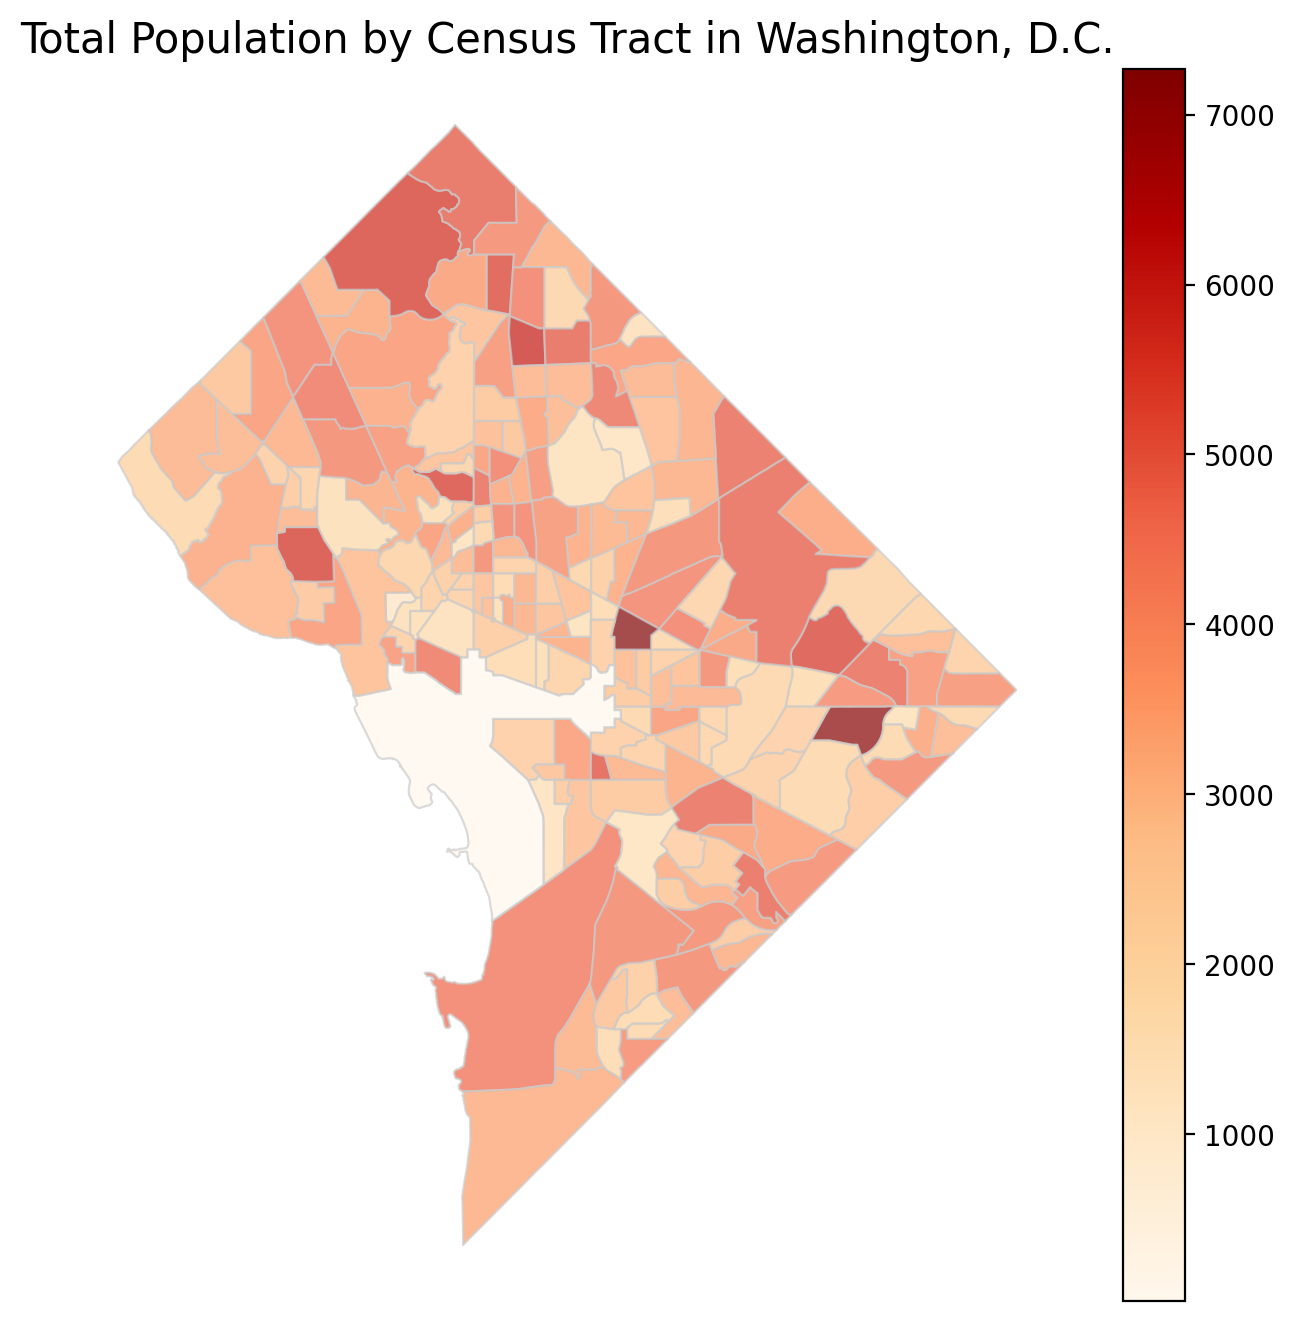

In [45]:
# Create a plot of the geometry of the GeoDataFrame
# Color the geometries based on the `Total` column using the "OrRd" colormap
# Add a title "Total Population by Census Tract in Washington, D.C."
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
gdf.plot(column='Total', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, alpha=0.7)
ax.set_title("Total Population by Census Tract in Washington, D.C.", fontsize=15)
ax.axis('off')
plt.show();